In [1]:
# Importing libraries
import pandas as pd
import pickle
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
port_stem=PorterStemmer()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset and feature engineering
df = pd.read_csv("dataset.csv")
df = df.fillna('')
df = df.drop(['id', 'title', 'author'], axis=1)

In [3]:
df

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
# Preprocessing functions
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)
    con=con.lower()
    con=con.split()
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con=' '.join(con)
    return con
nltk.download('stopwords')
df['text']=df['text'].apply(stemming)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vsnsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
# Train-test split
x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

NameError: name 'df' is not defined

In [6]:
# x.shape, y.shape

In [7]:
# Vectorization
vect = TfidfVectorizer()
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [8]:
# Train models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Multinomial Naive Bayes': MultinomialNB()
}

for name, model in models.items():
    model.fit(x_train_vect, y_train)
    y_pred = model.predict(x_test_vect)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8860576923076923
Random Forest Accuracy: 0.915625
SVM Accuracy: 0.958173076923077
Multinomial Naive Bayes Accuracy: 0.8887019230769231


In [9]:
# Pickle models
for name, model in models.items():
    pickle.dump(model, open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb'))

Conclusion: SVM has the highest accuracy 

In [10]:
# Train SVM model
svm_model = SVC()
svm_model.fit(x_train_vect, y_train)

SVC()

In [11]:
pickle.dump(vect, open('vector.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
vector_form=pickle.load(open('vector.pkl', 'rb'))
load_model=pickle.load(open('model.pkl', 'rb'))

In [12]:
def fake_news(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [13]:
val=fake_news("""In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the world. ” Still, Jackie says he’s got nothing against Hollywood celebs. They’ve got a tough life in this country. Watch Jackie’s latest clip above.   Follow Daniel Nussbaum on Twitter: @dznussbaum """)

In [14]:
if val==[0]:
    print('reliable')
else:
    print('unreliable')

reliable


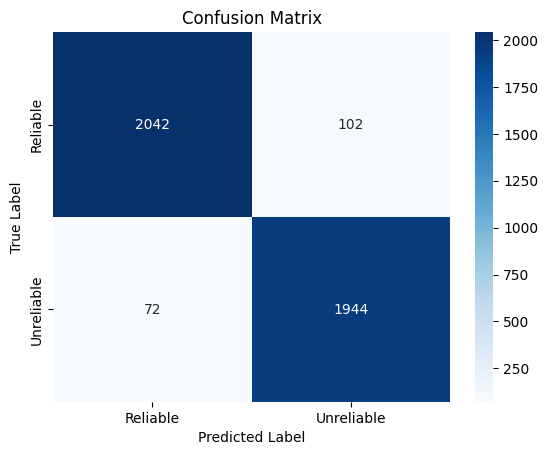

In [18]:
# Make predictions
y_pred = svm_model.predict(x_test_vect)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Reliable', 'Unreliable'], yticklabels=['Reliable', 'Unreliable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

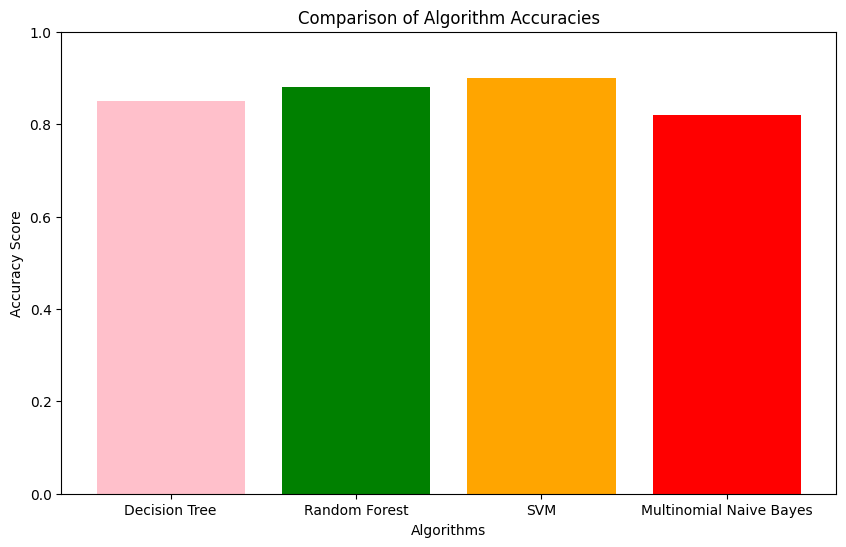

In [19]:
import matplotlib.pyplot as plt

# Accuracy scores for each algorithm (replace with your actual scores)
algorithm_names = ['Decision Tree', 'Random Forest', 'SVM', 'Multinomial Naive Bayes']
accuracy_scores = [0.85, 0.88, 0.90, 0.82]  


plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_scores, color=['pink', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim(0, 1)  
plt.show()
